# World Happiness Report


## 데이터 전처리

In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [316]:
path= "C:/Users/CHA-LAPTOP/Downloads/Project Data/world-happiness-report.csv"
df = pd.read_csv(path)
# 컬럼명 변경, 조회
df.rename(columns={"Country name": "Country", "year":"Year","Life Ladder":"Happiness_Score", "Log GDP per capita":"Economy", 
                  "Social support":"Society" , "Healthy life expectancy at birth":"Health", "Freedom to make life choices":"Freedom",
                   "Perceptions of corruption":"Corruption"}, inplace=True)
df.columns

Index(['Country', 'Year', 'Happiness_Score', 'Economy', 'Society', 'Health',
       'Freedom', 'Generosity', 'Corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

### 1. 결측값 처리

In [317]:
# 결측값 조회
df.isnull().sum()

Country              0
Year                 0
Happiness_Score      0
Economy             36
Society             13
Health              55
Freedom             32
Generosity          89
Corruption         110
Positive affect     22
Negative affect     16
dtype: int64

In [318]:
# df.dropna(thresh=11) # 결측값 1개라도 있으면 삭제, 남은데이터:1708
# df.dropna(thresh=10) # 결측값 2개 있으면 삭제, , 남은데이터 1873
df.dropna(thresh=9, inplace=True)   # 결측값 3개 있으면 삭제, 남은데이터: 1910
df.isnull().sum()

Country             0
Year                0
Happiness_Score     0
Economy            17
Society             2
Health             36
Freedom            22
Generosity         61
Corruption         94
Positive affect     5
Negative affect     2
dtype: int64

0.0005375878853434317

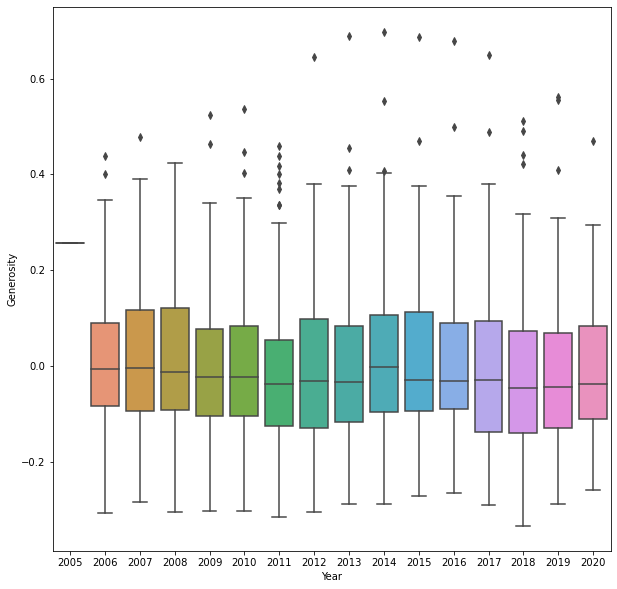

In [319]:
# Generosity 컬럼 조회
plt.figure(figsize=(10,10))
sns.boxplot(x= "Year",y= "Generosity",data= df)
df['Generosity'].mean()

In [320]:
# Generosity 컬럼 결측값 -> Generosity 평균값으로 변경 (61개 결측값 0으로 됨)
df['Generosity'].replace(np.nan, df['Generosity'].mean(), inplace=True)
# df['Generosity'].fillna(df['Generosity'],mean()).describe() 로도 할 수 있음
df.isnull().sum()

Country             0
Year                0
Happiness_Score     0
Economy            17
Society             2
Health             36
Freedom            22
Generosity          0
Corruption         94
Positive affect     5
Negative affect     2
dtype: int64

'\n# 전체 Corruption 중앙값, 평균값\nprint(df[\'Corruption\'].median())\nprint(df[\'Corruption\'].mean())\nfig=plt.figure(figsize=(10,5))\nax1= fig.add_subplot(1,1,1)\nsns.regplot(x=\'Corruption\', y=\'Happiness_Score\', data=df, ax=ax1)\n# 결측값 제거시 Generosity 정보\ndf.dropna(subset = [\'Corruption\'], inplace=True)\nfig=plt.figure(figsize=(5,5))\nax= fig.add_subplot(1,1,1)\nax.boxplot(x=df["Corruption"])\ndf[\'Corruption\'].mean()\n'

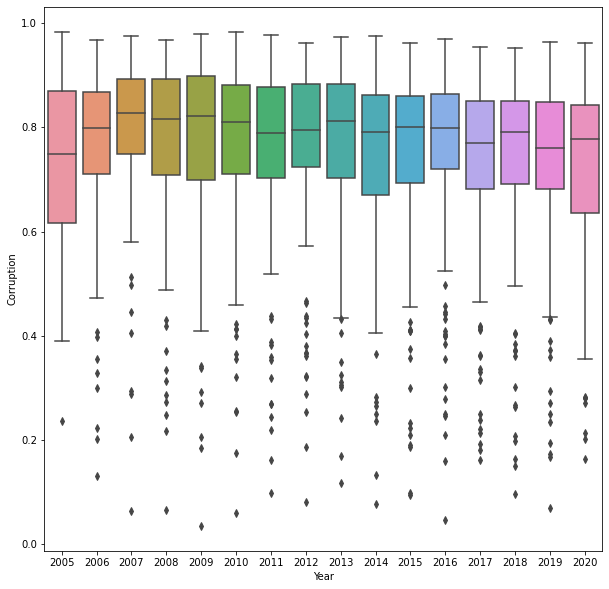

In [326]:
# 결측값 가장 많은 Corruption 컬럼 분석
plt.figure(figsize=(10,10))
sns.boxplot(x= "Year",y= "Corruption",data= df)
'''
# 전체 Corruption 중앙값, 평균값
print(df['Corruption'].median())
print(df['Corruption'].mean())
fig=plt.figure(figsize=(10,5))
ax1= fig.add_subplot(1,1,1)
sns.regplot(x='Corruption', y='Happiness_Score', data=df, ax=ax1)
# 결측값 제거시 Generosity 정보
df.dropna(subset = ['Corruption'], inplace=True)
fig=plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
ax.boxplot(x=df["Corruption"])
df['Corruption'].mean()
'''

In [362]:
# sklearn SimpleImputer 으로 나머지 결측값 처리
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean')
imputer.fit(df[['Economy','Society','Health','Freedom','Corruption','Positive affect','Negative affect']])
result = imputer.transform(df[['Economy','Society','Health','Freedom','Corruption','Positive affect','Negative affect']])
df[['Economy','Society','Health','Freedom','Corruption','Positive affect','Negative affect']]= result
result

array([[ 7.37 ,  0.451, 50.8  , ...,  0.882,  0.518,  0.258],
       [ 7.54 ,  0.552, 51.2  , ...,  0.85 ,  0.584,  0.237],
       [ 7.647,  0.539, 51.6  , ...,  0.707,  0.618,  0.275],
       ...,
       [ 8.049,  0.775, 55.6  , ...,  0.844,  0.71 ,  0.212],
       [ 7.95 ,  0.759, 56.2  , ...,  0.831,  0.716,  0.235],
       [ 7.829,  0.717, 56.8  , ...,  0.789,  0.703,  0.346]])

In [324]:
df.isnull().sum()

Country            0
Year               0
Happiness_Score    0
Economy            0
Society            0
Health             0
Freedom            0
Generosity         0
Corruption         0
Positive affect    0
Negative affect    0
dtype: int64

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1910 non-null   object 
 1   Year             1910 non-null   int64  
 2   Happiness_Score  1910 non-null   float64
 3   Economy          1910 non-null   float64
 4   Society          1910 non-null   float64
 5   Health           1910 non-null   float64
 6   Freedom          1910 non-null   float64
 7   Generosity       1910 non-null   float64
 8   Corruption       1910 non-null   float64
 9   Positive affect  1910 non-null   float64
 10  Negative affect  1910 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 243.6+ KB


### 2. 원핫인코딩

In [328]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
df['Year']= df['Year'].astype("category")

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          1910 non-null   object  
 1   Year             1910 non-null   category
 2   Happiness_Score  1910 non-null   float64 
 3   Economy          1910 non-null   float64 
 4   Society          1910 non-null   float64 
 5   Health           1910 non-null   float64 
 6   Freedom          1910 non-null   float64 
 7   Generosity       1910 non-null   float64 
 8   Corruption       1910 non-null   float64 
 9   Positive affect  1910 non-null   float64 
 10  Negative affect  1910 non-null   float64 
dtypes: category(1), float64(9), object(1)
memory usage: 231.2+ KB


### 3. 정규화, 상관계수

In [353]:
X= df[['Year','Happiness_Score','Economy','Society','Health','Freedom','Generosity','Corruption','Positive affect','Negative affect']]
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
dfx=pd.DataFrame(X)


<AxesSubplot:>

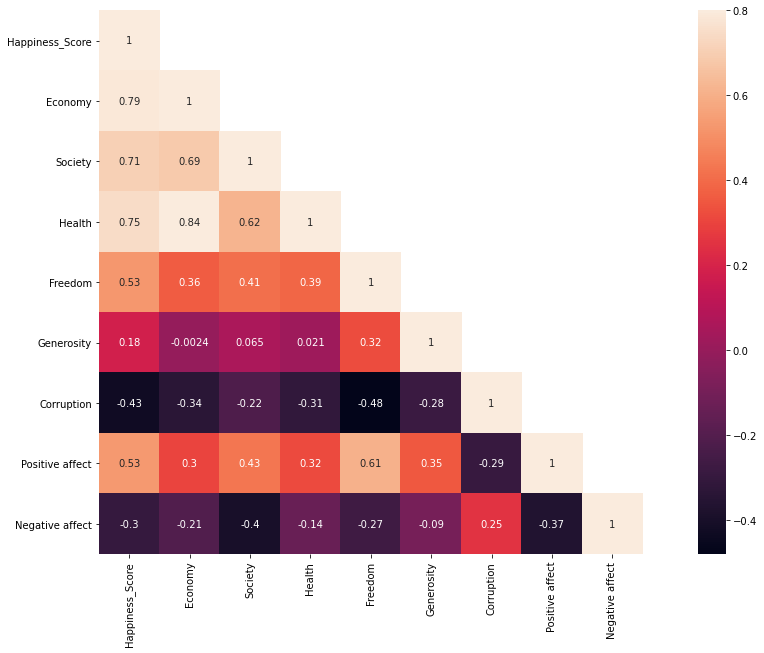

In [345]:
cm= df[['Country', 'Year', 'Happiness_Score', 'Economy', 'Society', 'Health',
       'Freedom', 'Generosity', 'Corruption', 'Positive affect',
       'Negative affect']]
cm= cm.corr()
mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, mask=mask,vmax=.8, square=True,annot=True)

### 4. VIF 계수

In [359]:
vif= pd.DataFrame()
vif["VIF Factor"]= [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif["features"]= df.columns[1:]
vif.round(1)

,VIF Factor,features
0,1.2,Year
1,4.3,Happiness_Score
2,4.7,Economy
3,2.6,Society
4,3.8,Health
5,2.2,Freedom
6,1.3,Generosity
7,1.5,Corruption
8,2.1,Positive affect
9,1.4,Negative affect


In [360]:
# 정규화 안했을경우 VIF 계수
X= df[['Year','Happiness_Score','Economy','Society','Health','Freedom','Generosity','Corruption','Positive affect','Negative affect']]
vif= pd.DataFrame()
vif["VIF Factor"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"]= X.columns
vif.round(1)

,VIF Factor,features
0,229.7,Year
1,105.2,Happiness_Score
2,317.3,Economy
3,123.1,Society
4,269.2,Health
5,57.4,Freedom
6,1.3,Generosity
7,27.3,Corruption
8,92.2,Positive affect
9,15.1,Negative affect
